## OBS Data Analysis from "Zu nah?" project at TH Wildau
based on open data ressources only

created by Simon Metzler at Radprofessur Wildau 

* project page https://innohub13.de/wir-forschen/zu-nah/ 
* page of Radprofessur https://www.th-wildau.de/radverkehr

### Index: 
* [import python packages](#import) 
* [parse data](#parse)
* [Geo overview](#geo) 
* [pre processing data](#pre) 
* [left-right analysis](#analysis) 

---
<a id="import">import python packages<a> 

In [5]:
import json  
import geopandas as gpd
import pandas as pd

In [6]:
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

---
<a id="parse">parse data<a> 

In [7]:
# manual downlaod from export-tab (automatic download is possible yet not encouraged)
#https://obs.adfc-brandenburg.de/
#https://obs.adfc-bw.de/
#https://obs.radentscheid-essen.de/
#https://portal.openbikesensor.org/
#https://obs.adfc-darmstadt.de/

# Stand 07.11.22

files = glob.glob(r'portale\*.geojson')

len(files)

6

In [22]:
gdf =gpd.GeoDataFrame()

for f in tqdm(files):
    gdf_this = gpd.read_file(f, crs='EPSG:4326')
    portal_name=f.split('_')[-1].replace('.geojson','')
    gdf_this['portal']= portal_name

    gdf=gdf.append(gdf_this)
    
    print (portal_name)
    print (len(gdf_this))

 17%|██████████████                                                                      | 1/6 [00:01<00:05,  1.11s/it]

bbb
15523


 33%|████████████████████████████                                                        | 2/6 [00:02<00:05,  1.40s/it]

bw
20209


 50%|██████████████████████████████████████████                                          | 3/6 [00:04<00:04,  1.42s/it]

darmstadt
18420


 67%|████████████████████████████████████████████████████████                            | 4/6 [00:05<00:02,  1.22s/it]

essen
11480


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.39s/it]

obs-portal
40722
os
2107


In [23]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal
0,1.82,NaN,-1,28496022.0,1.913791,4.611111,2022-05-09 15:22:33+00:00,POINT (13.42786 52.47392),bbb
1,0.71,NaN,-1,28496022.0,1.927347,1.666667,2022-05-09 15:22:48+00:00,POINT (13.42766 52.47430),bbb
2,1.57,0.50,-1,849599088.0,1.934648,4.500000,2022-05-09 15:23:26+00:00,POINT (13.42738 52.47485),bbb
3,1.26,0.74,-1,568336446.0,1.878984,4.138889,2022-05-09 15:23:33+00:00,POINT (13.42746 52.47528),bbb
4,2.05,NaN,-1,816236476.0,2.021442,4.083333,2022-05-09 15:23:44+00:00,POINT (13.42769 52.47581),bbb
...,...,...,...,...,...,...,...,...,...
2102,1.29,2.41,1,93245513.0,0.794396,3.916667,2022-11-01 05:42:58+00:00,POINT (8.00970 52.26666),os
2103,1.69,NaN,1,93245513.0,0.721962,2.361111,2022-11-01 05:43:05+00:00,POINT (8.01000 52.26678),os
2104,1.39,NaN,1,93245513.0,0.536645,2.138889,2022-11-01 05:43:08+00:00,POINT (8.01010 52.26682),os
2105,1.52,NaN,1,93245513.0,0.930771,2.750000,2022-11-01 05:43:16+00:00,POINT (8.01051 52.26698),os


---
<a id="geo">Geo overview<a> 

<AxesSubplot:>

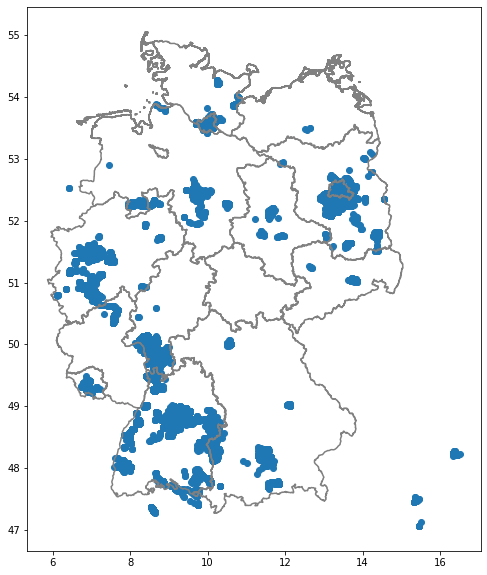

In [24]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax)

bland = gpd.read_file("https://raw.githubusercontent.com/isellsoap/deutschlandGeoJSON/main/2_bundeslaender/1_sehr_hoch.geo.json")
bland.boundary.plot(ax=ax, color='gray')

---
<a id="pre">pre processing<a> 


In [25]:
# from m in cm
gdf['distance_overtaker']=gdf['distance_overtaker']*100
gdf['distance_stationary']=gdf['distance_stationary']*100

In [26]:
#adding bins of distance_overtaker

#20cm
bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
labels = ['<20','20-40','40-60','60-80','80-100','100-120','120-140','140-160','160-180','180-200']
gdf['Right_binned_label'] = pd.cut(gdf['distance_stationary'], bins, labels=labels)

##50cm
#bins = [0,50,100,150,200,250,400]
#labels = ['<50','50-100','100-150','150-200','200-250','>250']
#gdf['distance_overtaker_binned'] = pd.cut(gdf['distance_overtaker'], bins=bins, labels=labels)
#
##25cm
#bins = list(range(0,260,25))
#bins.append(400)
#labels = ['<25','25-50','50-75','75-100','100-125','125-150','150-175','175-200','200-225','225-250','>250']
#gdf['distance_overtaker_binned_25'] = pd.cut(gdf['distance_overtaker'], bins=bins, labels=labels)

<AxesSubplot:xlabel='distance_stationary', ylabel='distance_overtaker'>

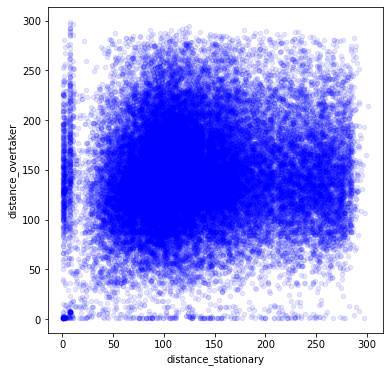

In [27]:
#left-right overview
#kaputte ultraschallsensoren werden sichtbar, häufung von Werten <10cm
gdf.plot(kind='scatter', y='distance_overtaker', x='distance_stationary', alpha=0.1, figsize=(6,6), color='blue')

In [28]:
# remove all datapoints with meassuerements below 15cm to clean wrong messurements due to ultrasonic sensor issues
gdf=gdf[~(gdf.distance_overtaker<15)&~(gdf.distance_stationary<15)].copy()

<AxesSubplot:xlabel='distance_stationary', ylabel='distance_overtaker'>

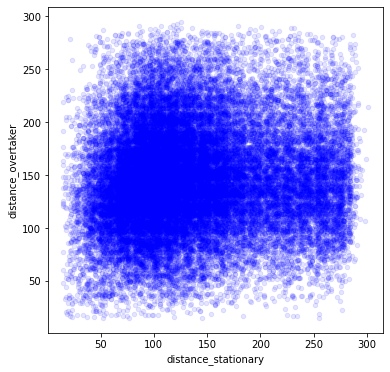

In [29]:
# wenn man alle werte unter 15cm rausfiltert sieht es plausibel aus
gdf.plot(kind='scatter', y='distance_overtaker', x='distance_stationary', alpha=0.1, figsize=(6,6), color='blue')

In [30]:
gdf

,distance_overtaker,distance_stationary,direction,way_id,course,speed,time,geometry,portal,Right_binned_label
0,182.0,NaN,-1,28496022.0,1.913791,4.611111,2022-05-09 15:22:33+00:00,POINT (13.42786 52.47392),bbb,NaN
1,71.0,NaN,-1,28496022.0,1.927347,1.666667,2022-05-09 15:22:48+00:00,POINT (13.42766 52.47430),bbb,NaN
2,157.0,50.0,-1,849599088.0,1.934648,4.500000,2022-05-09 15:23:26+00:00,POINT (13.42738 52.47485),bbb,40-60
3,126.0,74.0,-1,568336446.0,1.878984,4.138889,2022-05-09 15:23:33+00:00,POINT (13.42746 52.47528),bbb,60-80
4,205.0,NaN,-1,816236476.0,2.021442,4.083333,2022-05-09 15:23:44+00:00,POINT (13.42769 52.47581),bbb,NaN
...,...,...,...,...,...,...,...,...,...,...
2102,129.0,241.0,1,93245513.0,0.794396,3.916667,2022-11-01 05:42:58+00:00,POINT (8.00970 52.26666),os,NaN
2103,169.0,NaN,1,93245513.0,0.721962,2.361111,2022-11-01 05:43:05+00:00,POINT (8.01000 52.26678),os,NaN
2104,139.0,NaN,1,93245513.0,0.536645,2.138889,2022-11-01 05:43:08+00:00,POINT (8.01010 52.26682),os,NaN
2105,152.0,NaN,1,93245513.0,0.930771,2.750000,2022-11-01 05:43:16+00:00,POINT (8.01051 52.26698),os,NaN


---
<a id="analysis">left-right analysis<a> 

<AxesSubplot:title={'center':'distance_overtaker'}, xlabel='[Right_binned_label]'>

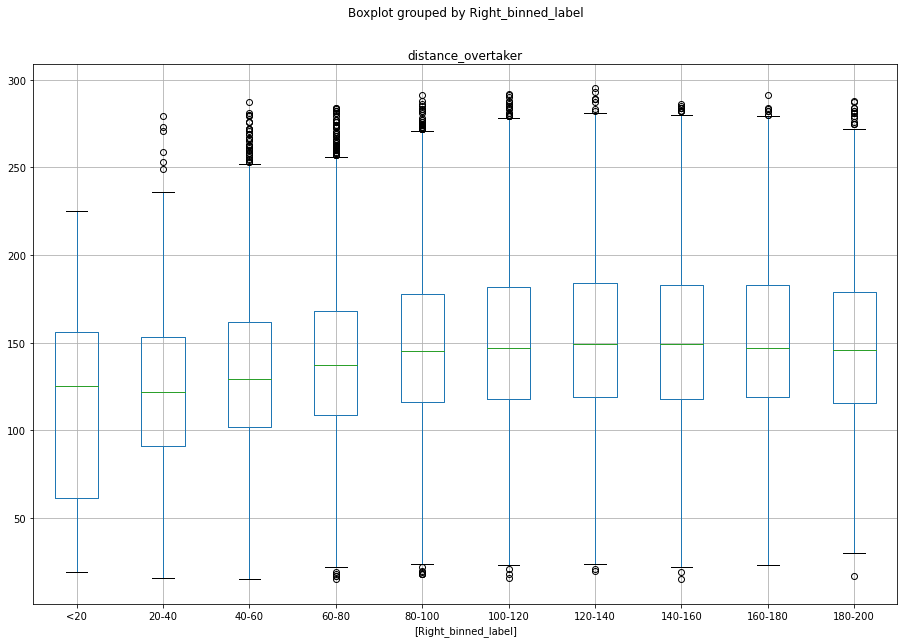

In [31]:
gdf.boxplot(column=['distance_overtaker'], by=['Right_binned_label'], figsize=(15,10))

----

In [32]:
sns.set(rc={'figure.figsize':(12,8)})

In [33]:
sns.set_context("talk")

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=26597)')

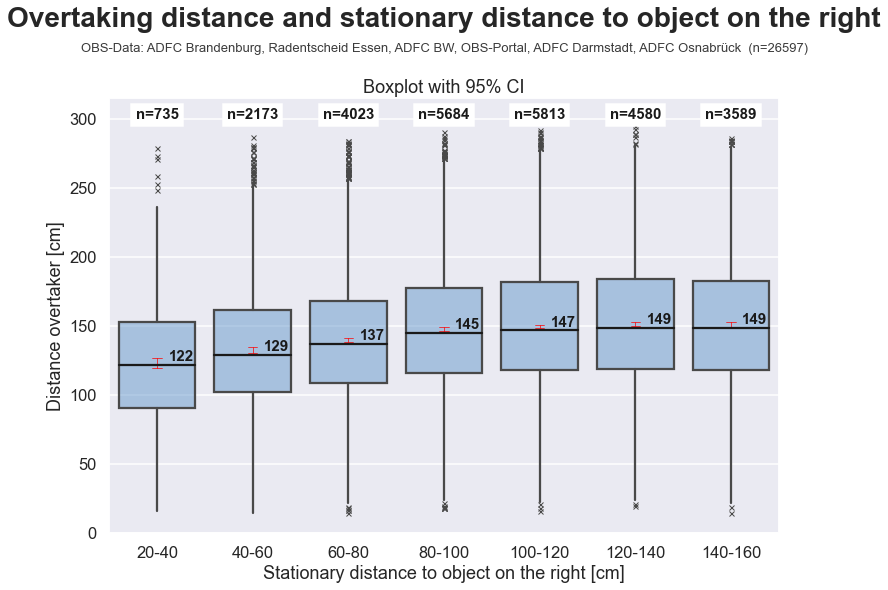

In [36]:
x_ax='Right_binned_label'

data_c_plot=gdf[gdf.Right_binned_label.notnull()]
data_c_plot=data_c_plot[(data_c_plot.distance_stationary>20) & (data_c_plot.distance_stationary<160)].copy()
for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()


x_ax_ordered_str=data_c_plot[x_ax].unique()

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
   # notch=True, 
    showcaps=False,
    flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
#medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
#counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,300,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add CI
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    #order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)


ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('Stationary distance to object on the right [cm]')
#ax.set_xlabel(str(x_ax) + ' [m]')

ax1.set(ylim=(0, 315))



#add overall title
ax.text(x=0.5, y=1.15, s='Overtaking distance and stationary distance to object on the right', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück  (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("plots/OBS_analysis_leftright_allPortal.png", dpi=300, bbox_inches="tight") 

C:\Users\simon\AppData\Local\Temp/ipykernel_8696/75437982.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])


Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück (n=26597)')

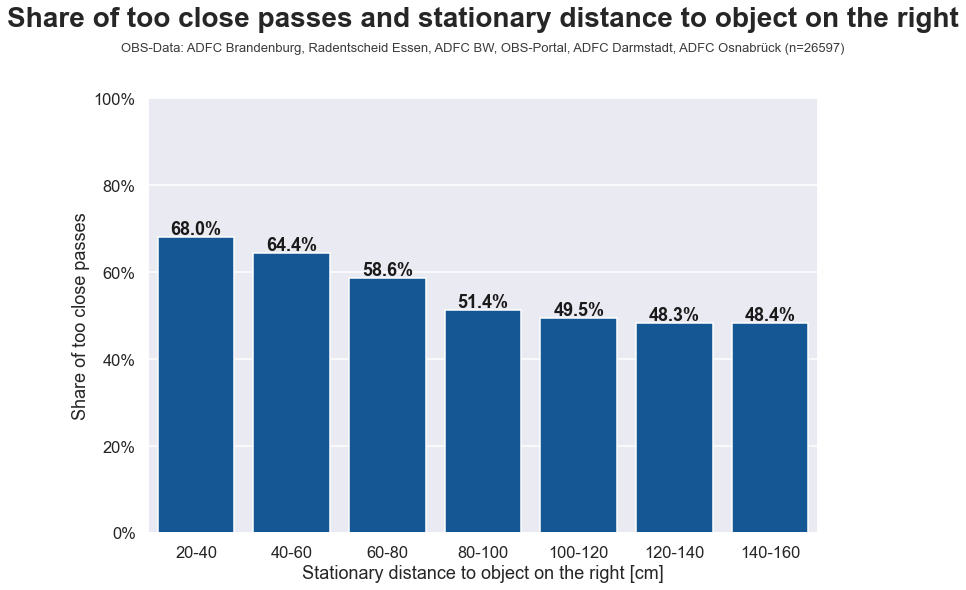

In [38]:
#anteil_zunah.plot(kind='bar')

data_c_plot['zuNah']=data_c_plot.distance_overtaker.apply(lambda x: 1 if x<=150 else 0)
# anteil zunah?
anteil_zunah=data_c_plot.groupby('Right_binned_label')['zuNah'].sum() / data_c_plot.groupby('Right_binned_label')['zuNah'].count()
anteil_zunah

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )
ax= sns.barplot(data=anteil_zunah.reset_index(), x='Right_binned_label', y='zuNah', color='#0058A9')

### add labels to ax
# share
share = anteil_zunah.reset_index()['zuNah']
#medians=medians.reindex(x_ax_ordered_str)
#vertical_offset = share * 0.02 # offset from median for display

for xtick in ax.get_xticks():
   # ax.text(xtick+0.25,share[xtick] + vertical_offset, "test",#round(share[xtick],3), 
    ax.text(xtick,share[xtick]*1.01 , '{:.1%}'.format(share[xtick]),    #round(share[xtick],3), 

            horizontalalignment='center',
             size='medium',
             color='k',
             weight='semibold')

ax.set(ylim=(0, 1))

# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])


ax.set_ylabel('Share of too close passes')
ax.set_xlabel('Stationary distance to object on the right [cm]')



#add overall title
ax.text(x=0.5, y=1.15, s='Share of too close passes and stationary distance to object on the right', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots\OBS_analysis_leftright_alle_zunah.png", dpi=300, bbox_inches="tight") 

---
### Brandenburg only

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg (n=4364)')

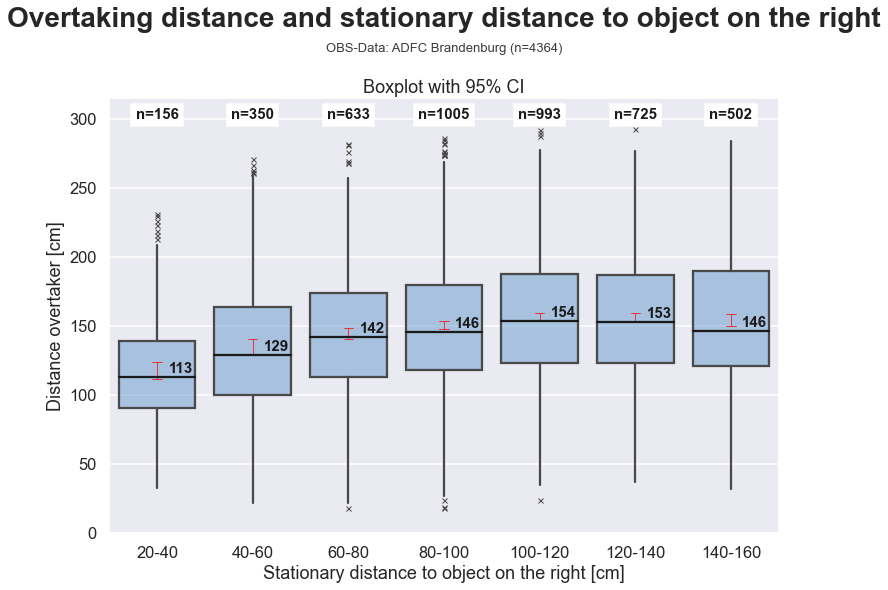

In [39]:
x_ax='Right_binned_label'

data_c_plot=gdf[gdf.Right_binned_label.notnull()]
data_c_plot=data_c_plot[data_c_plot['portal']=='bbb']
data_c_plot=data_c_plot[(data_c_plot.distance_stationary>20) & (data_c_plot.distance_stationary<160)].copy()
for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()


x_ax_ordered_str=data_c_plot[x_ax].unique()

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

### add boxplot left
ax1= sns.boxplot(
    data=data_c_plot, x=x_ax, y="distance_overtaker",
   # notch=True, 
    showcaps=False,
    flierprops={"marker": "x"},
    #order = x_ax_ordered_str,
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "k"},
    ax=ax)

### add labels to ax1
# medians
medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
#medians=medians.reindex(x_ax_ordered_str)
vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick+0.25,medians[xtick] + vertical_offset, int(medians[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold')
    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
#counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax1.get_xticks():
    ax1.text(xtick,300,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))


### add CI
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    #order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)

#ax3 = sns.stripplot(data=data_c_plot, x=x_ax, y="distance_overtaker",color="grey", alpha=0.2)

#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax1.set(title='Boxplot with 95% CI')
ax1.set_ylabel('Distance overtaker [cm]')
ax1.set_xlabel('Stationary distance to object on the right [cm]')

ax.set(ylim=(0, 315))

#add overall title
ax.text(x=0.5, y=1.15, s='Overtaking distance and stationary distance to object on the right', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("plots\OBS_analysis_leftright_bbb.png", dpi=300, bbox_inches="tight") 

Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg (n=4364)')

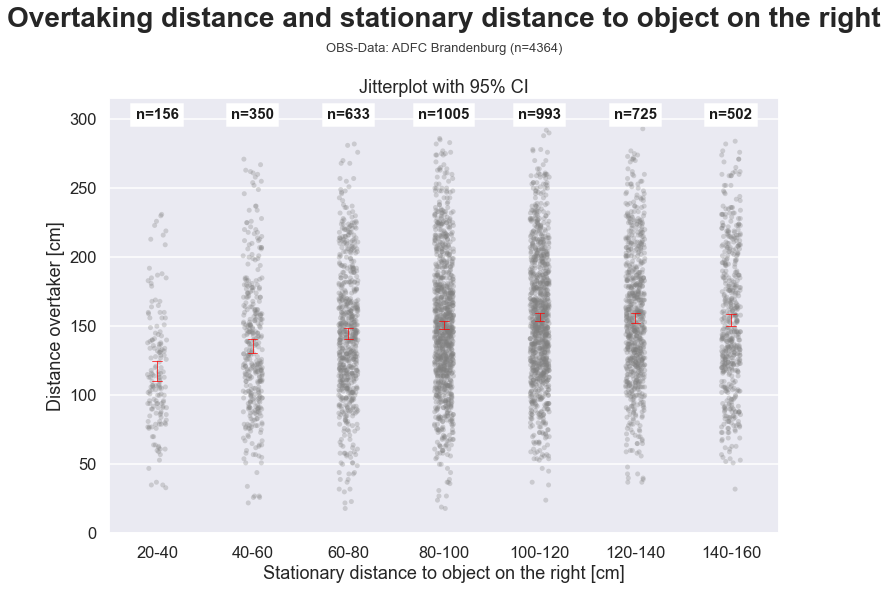

In [41]:
x_ax='Right_binned_label'

data_c_plot=gdf[gdf.Right_binned_label.notnull()]
data_c_plot=data_c_plot[data_c_plot['portal']=='bbb']
data_c_plot=data_c_plot[(data_c_plot.distance_stationary>20) & (data_c_plot.distance_stationary<160)].copy()
for col in data_c_plot.dtypes.loc[lambda x: x == 'category'].index:
    data_c_plot[col] = data_c_plot[col].cat.remove_unused_categories()


x_ax_ordered_str=data_c_plot[x_ax].unique()

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )

#### add boxplot left
#ax1= sns.boxplot(
#    data=data_c_plot, x=x_ax, y="distance_overtaker",
#   # notch=True, 
#    showcaps=False,
#    flierprops={"marker": "x"},
#    #order = x_ax_ordered_str,
#    boxprops={"facecolor": (.4, .6, .8, .5)},
#    medianprops={"color": "k"},
#    ax=ax)




### add CI
ax2= sns.barplot( 
    data=data_c_plot, x=x_ax, y="distance_overtaker",
    #palette="Blues", 
    #order = x_ax_ordered_str,
    alpha=0.0,
    capsize=.1, n_boot=1000, ci=95,
        errcolor= 'red', #errcolor='.26' =
    errwidth=0.7, 
    ax=ax)

ax3 = sns.stripplot(data=data_c_plot, x=x_ax, y="distance_overtaker",color="grey", alpha=0.3, ax=ax, zorder=1)



#### add labels to ax1
## medians
#medians = data_c_plot.groupby([x_ax])['distance_overtaker'].median()
##medians=medians.reindex(x_ax_ordered_str)
#vertical_offset = data_c_plot['distance_overtaker'].median() * 0.02 # offset from median for display
#
#for xtick in ax2.get_xticks():
#    ax2.text(xtick+0.25,medians[xtick] + vertical_offset, int(medians[xtick]), 
#            horizontalalignment='center',
#             size='small',
#             color='k',
#             weight='semibold')
#    
# counts on top   
counts = data_c_plot.groupby([x_ax])['distance_overtaker'].count()#.astype(int)
#counts=counts.reindex(x_ax_ordered_str)
#vertical_offset = 0.99 # offset from median for display

for xtick in ax2.get_xticks():
    ax2.text(xtick,300,"n=" +str(counts[xtick]), 
            horizontalalignment='center',
             size='small',
             color='k',
             weight='semibold',
            bbox=dict(facecolor='w'))



#ax.set_xticklabels(ax1.get_xmajorticklabels(), rotation=30)
#ax.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)

ax2.set(title='Jitterplot with 95% CI')
ax2.set_ylabel('Distance overtaker [cm]')
ax2.set_xlabel('Stationary distance to object on the right [cm]')
#ax.set_xlabel(str(x_ax) + ' [m]')

#ax1.set(title='Boxplot')
#ax2.set(title='Confidence Interval')
#ax2.set_ylabel('')
ax.set(ylim=(0, 315))


#add overall title
#ax.text(x=0.5, y=1.1, s='Overtaking distance and stationary distance to object on the right', fontsize=18, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg, Radentscheid Essen, ADFC BW, OBS-Portal, ADFC Darmstadt, ADFC Osnabrück:  (n=" + str(counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

ax.text(x=0.5, y=1.15, s='Overtaking distance and stationary distance to object on the right', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
#ax.text(x=0.5, y=1.07, s="OBS-Data: ADFC Brandenburg:  (n=" + str(counts.sum())+')', fontsize=9, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.show()
#fig.savefig("plots\OBS_analysis_leftright_bbb_jitter.png", dpi=300, bbox_inches="tight") 

C:\Users\simon\AppData\Local\Temp/ipykernel_8696/705740633.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])


Text(0.5, 1.1, 'OBS-Data: ADFC Brandenburg (n=4364)')

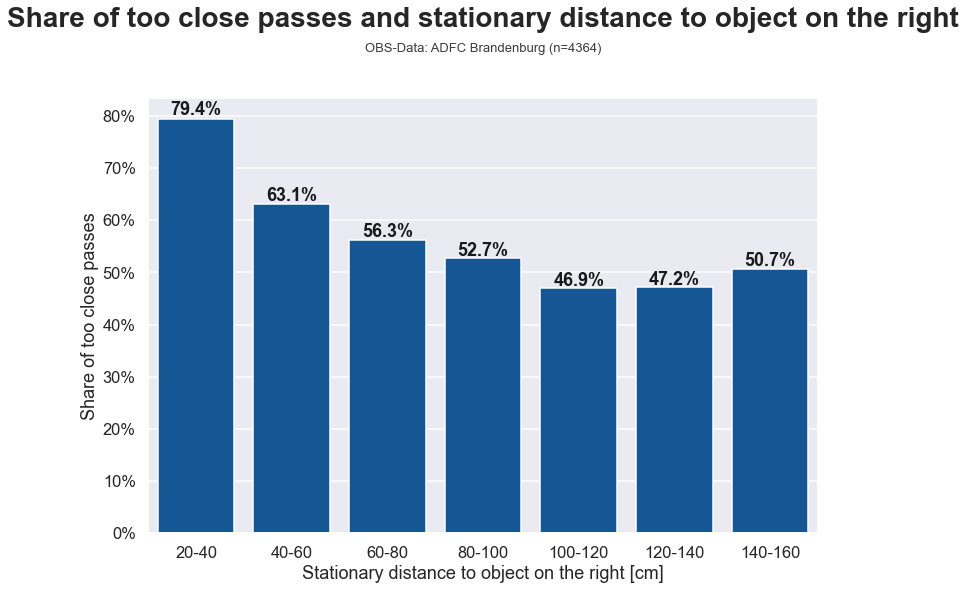

In [42]:
#anteil_zunah.plot(kind='bar')

data_c_plot['zuNah']=data_c_plot.distance_overtaker.apply(lambda x: 1 if x<=150 else 0)
# anteil zunah?
anteil_zunah=data_c_plot.groupby('Right_binned_label')['zuNah'].sum() / data_c_plot.groupby('Right_binned_label')['zuNah'].count()
anteil_zunah

fig, ax =plt.subplots(
                      figsize=(12,8),
                     )
ax= sns.barplot(data=anteil_zunah.reset_index(), x='Right_binned_label', y='zuNah', color='#0058A9')

### add labels to ax
# share
share = anteil_zunah.reset_index()['zuNah']
#medians=medians.reindex(x_ax_ordered_str)
#vertical_offset = share * 0.02 # offset from median for display

for xtick in ax.get_xticks():
   # ax.text(xtick+0.25,share[xtick] + vertical_offset, "test",#round(share[xtick],3), 
    ax.text(xtick,share[xtick]*1.01 , '{:.1%}'.format(share[xtick]),    #round(share[xtick],3), 

            horizontalalignment='center',
             size='medium',
             color='k',
             weight='semibold')


# manipulate
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(x) for x in vals])


ax.set_ylabel('Share of too close passes')
ax.set_xlabel('Stationary distance to object on the right [cm]')

#add overall title
ax.text(x=0.5, y=1.15, s='Share of too close passes and stationary distance to object on the right', fontsize=28, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.10, s="OBS-Data: ADFC Brandenburg (n=" + str(counts.sum())+')', fontsize=13, alpha=0.9, ha='center', va='bottom', transform=ax.transAxes)

#fig.savefig("plots\OBS_analysis_leftright_bbb_zunah.png", dpi=300, bbox_inches="tight") 